* `CustomerID`: Unique ID for each customer
* `Gender`: Randomly 'Male' or 'Female'
* `Age`: Random int between 18-65
* `Tenure`: Random tenure between 0-5 years
* `Balance`: Random float centered around $5000
* `Churn`: Random binary target 0 or 1 with 70% retaining customers

## Importing Necessary Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

col_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print('Setup Complete!')

Setup Complete!


In [36]:
## Loading the data

cus_df = pd.read_csv('E:\Customer_Churn_Prediction\Dataset\Churn_Modelling.csv')
cus_df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3927,3928,15651943,Richards,580,Spain,Female,65,1,0.00,2,0,1,103182.46,0
5676,5677,15568104,Zubarev,749,France,Female,26,6,0.00,2,0,1,34948.77,0
972,973,15605918,Padovesi,635,Germany,Male,43,5,78992.75,2,0,0,153265.31,0
7757,7758,15641585,Newton,850,France,Male,40,6,97339.99,1,0,1,88815.25,0
3902,3903,15720305,Power,591,Spain,Female,40,1,86376.29,1,0,1,136767.16,1
5219,5220,15625819,Arnold,625,France,Female,38,7,0.00,1,1,0,164804.02,0
4059,4060,15691952,Fanucci,676,France,Male,37,10,106242.67,1,1,1,166678.28,0
1777,1778,15701946,Ndubueze,715,France,Male,34,4,124314.45,1,0,0,97782.92,0
3323,3324,15740630,Pisano,487,Spain,Female,31,1,0.00,2,1,0,158750.13,0
9206,9207,15611767,Mai,624,Germany,Female,52,0,133723.43,1,0,0,4859.59,1


In [37]:
cus_df.shape

(10000, 14)

In [38]:
## Checking for null values
cus_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
cus_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
cus_df.drop(columns=['CustomerId','RowNumber','Surname'], axis=1, inplace=True)

In [42]:
cus_df.rename(columns={'Exited':'Target'}, inplace=True)

In [43]:
cus_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


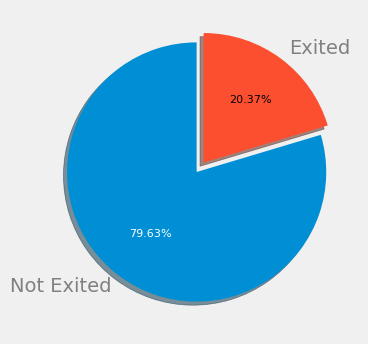

In [44]:
values = cus_df.Target.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize=(4,4), dpi=100)

explode = (0, 0.09)

patches, text, autotexts = ax.pie(values, labels=labels,
                                  autopct='%1.2f%%', shadow=True,
                                  startangle=90, explode=explode)

plt.setp(text, color='grey')
plt.setp(autotexts, size=8, color='white')
autotexts[1].set_color('black')
plt.show()


* 30% of customers have churned and 70% haven't.

In [45]:
cus_df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

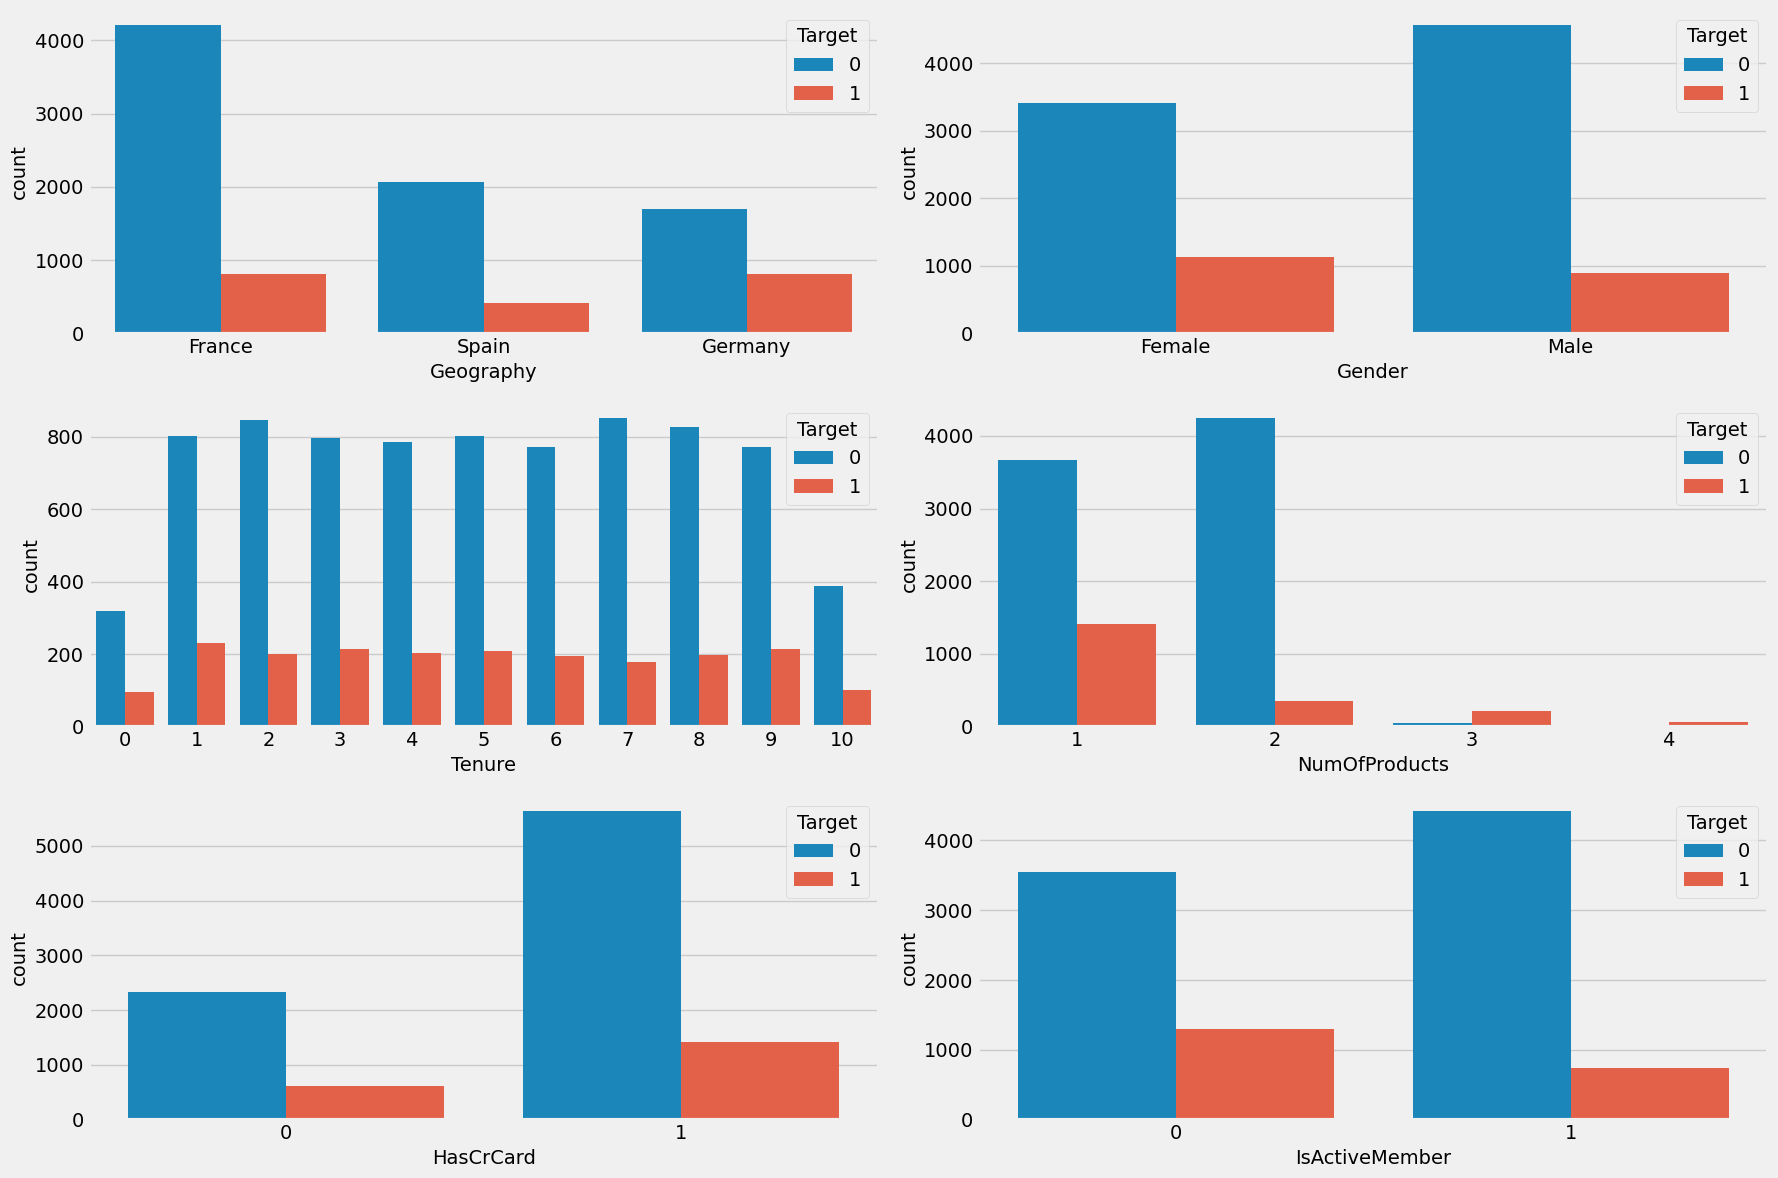

In [46]:
## Visualizing categorical variables

fig, ax = plt.subplots(3,2,figsize=(18,12))

sns.countplot(x='Geography', hue = 'Target', data = cus_df, ax = ax[0,0])
sns.countplot(x='Gender', hue = 'Target', data = cus_df, ax = ax[0,1])
sns.countplot(x='Tenure', hue = 'Target', data = cus_df, ax = ax[1,0])
sns.countplot(x='NumOfProducts', hue = 'Target', data = cus_df, ax = ax[1,1])
sns.countplot(x='HasCrCard', hue = 'Target', data = cus_df, ax = ax[2,0])
sns.countplot(x='IsActiveMember', hue = 'Target', data = cus_df, ax = ax[2,1])

plt.tight_layout()
plt.show()


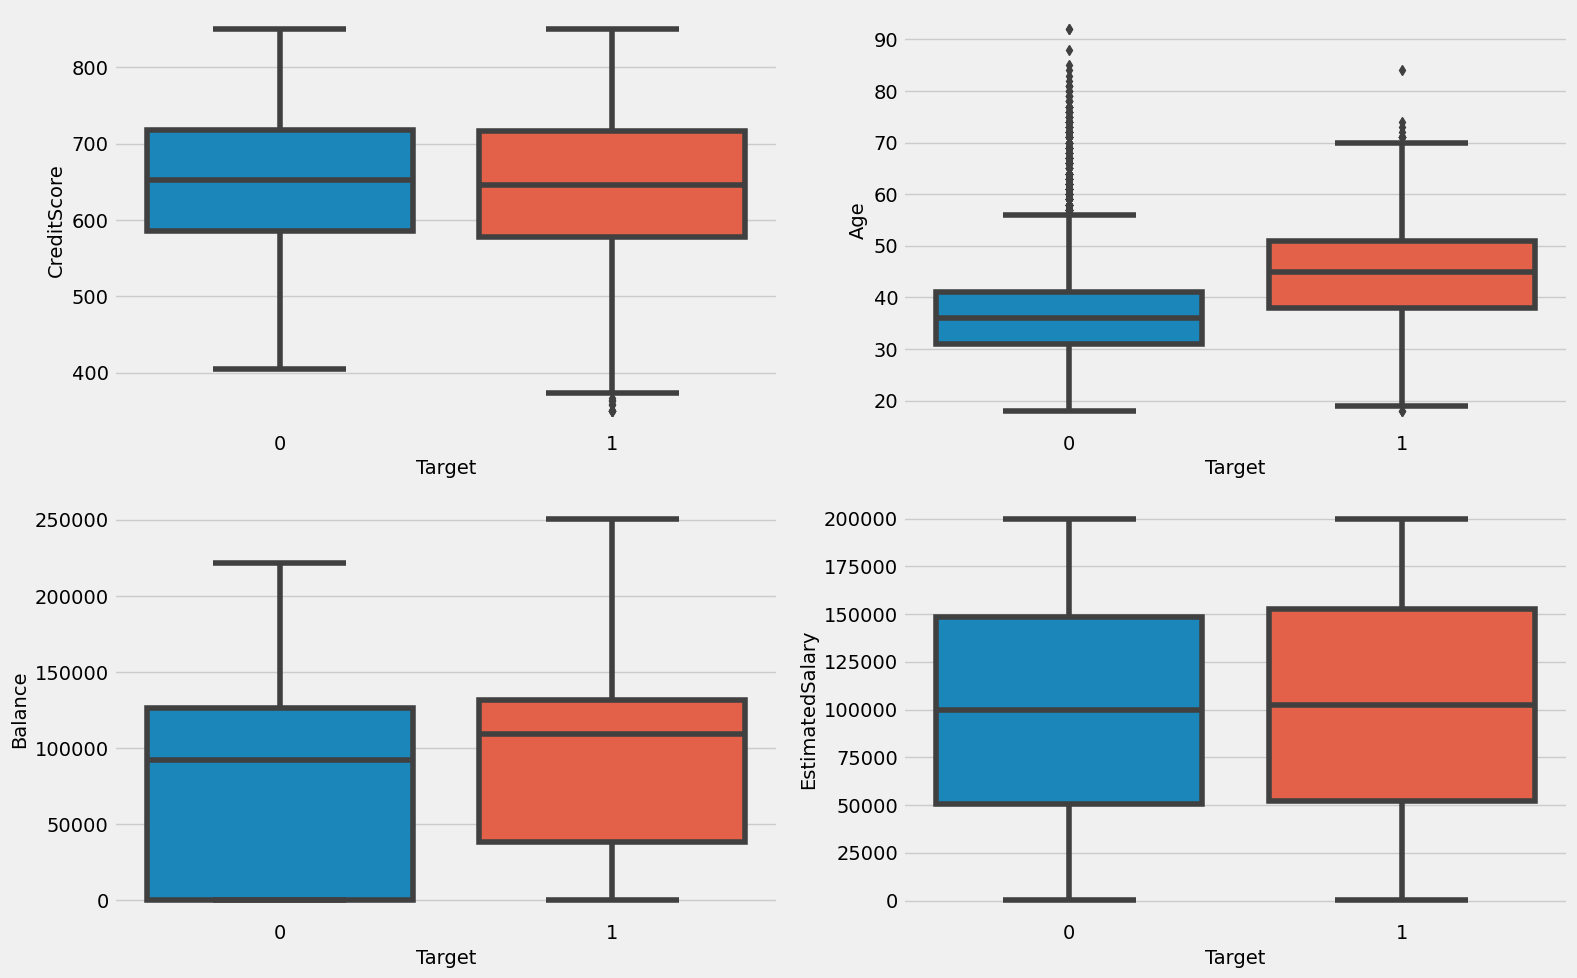

In [47]:
## Visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Target', y = 'CreditScore', data = cus_df, ax = ax[0][0])
sns.boxplot(x = 'Target', y = 'Age', data = cus_df, ax = ax[0][1])
sns.boxplot(x = 'Target', y = 'Balance', data = cus_df, ax = ax[1][0])
sns.boxplot(x = 'Target', y = 'EstimatedSalary', data = cus_df, ax = ax[1][1])

plt.tight_layout()
plt.show()

## Heatmap

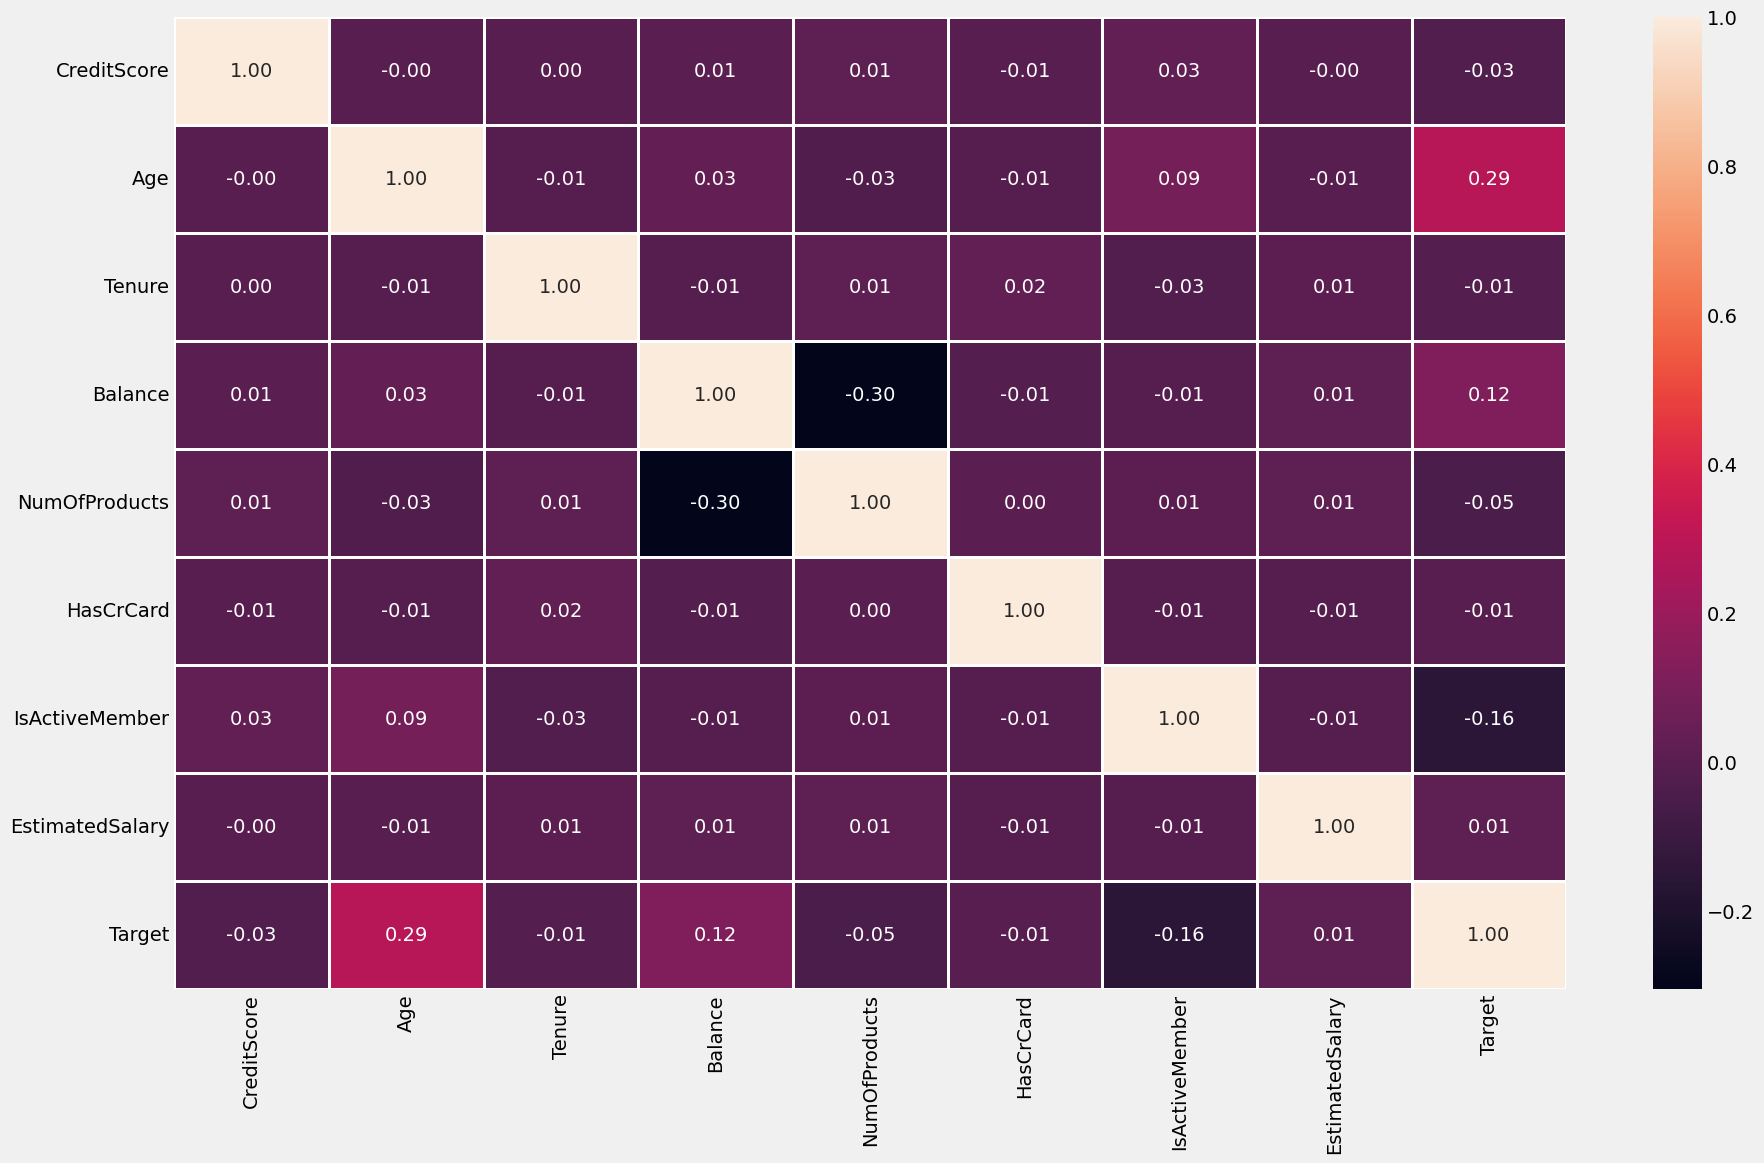

In [48]:
plt.figure(figsize=(20,12))

corr = cus_df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = '.2f')
plt.show()

In [49]:
print(f'{cus_df.Geography.value_counts()}\n\n{cus_df.Gender.value_counts()}')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64


In [50]:
## Encoding categorical variables

cus_df['Geography'] = cus_df['Geography'].map({'France':0,'Germany':1, 'Spain':2})

cus_df.Gender = cus_df.Gender.map({'Male':0, 'Female':1})

In [51]:
cus_df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Target
2832,582,0,0,20,4,0.00,1,1,1,55763.66,0
8296,692,0,1,34,7,0.00,2,1,0,195074.62,0
1964,800,0,1,40,5,97764.41,1,1,0,98640.15,1
3253,585,0,1,38,5,0.00,1,1,1,87363.56,0
6784,728,1,1,32,9,127772.10,2,1,1,152643.48,0
7271,504,1,0,42,7,131287.36,2,1,1,149697.78,0
1687,850,2,0,37,4,137204.77,1,1,1,28865.59,0
6046,593,1,0,69,2,187013.13,2,0,1,105898.69,0
2774,564,0,1,28,1,0.00,1,1,1,162428.05,0
9712,637,0,0,32,3,0.00,2,1,1,197827.06,0


In [52]:
cus_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Target'],
      dtype='object')

In [53]:
## Creating Features and Labels

X = cus_df.iloc[:,:10]
y = cus_df.iloc[:,10]

In [54]:
## Splitting data into training set and test test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

print(f'Training Set: {X_train.shape[0]}, Test Set: {X_test.shape[0]}')

Training Set: 7000, Test Set: 3000


In [55]:
## Scaling the data

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Training

* Logistic Regression

In [56]:
## Set regularization rate
reg = 0.01

## Training the logistic regression model on training set

lr = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)

## Predictions

predictions = lr.predict(X_test)
print(f'Predicted Labels: {predictions}\nActual Labels: {y_test}\n')

print(f'Accuracy Score: {accuracy_score(y_test, predictions)}')

Predicted Labels: [0 0 0 ... 0 0 0]
Actual Labels: 9394    0
898     1
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    1
Name: Target, Length: 3000, dtype: int64

Accuracy Score: 0.803


In [58]:
print(f'Overall Precision: {precision_score(y_test, predictions)}')
print(f'Overall Recall: {recall_score(y_test, predictions)}')

Overall Precision: 0.5815217391304348
Overall Recall: 0.1723027375201288


In [59]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2302   77]
 [ 514  107]]


* A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [60]:
y_scores = lr.predict_proba(X_test)
print(y_scores)

[[0.84645023 0.15354977]
 [0.60052225 0.39947775]
 [0.80944184 0.19055816]
 ...
 [0.86702458 0.13297542]
 [0.51069952 0.48930048]
 [0.73761369 0.26238631]]


* The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

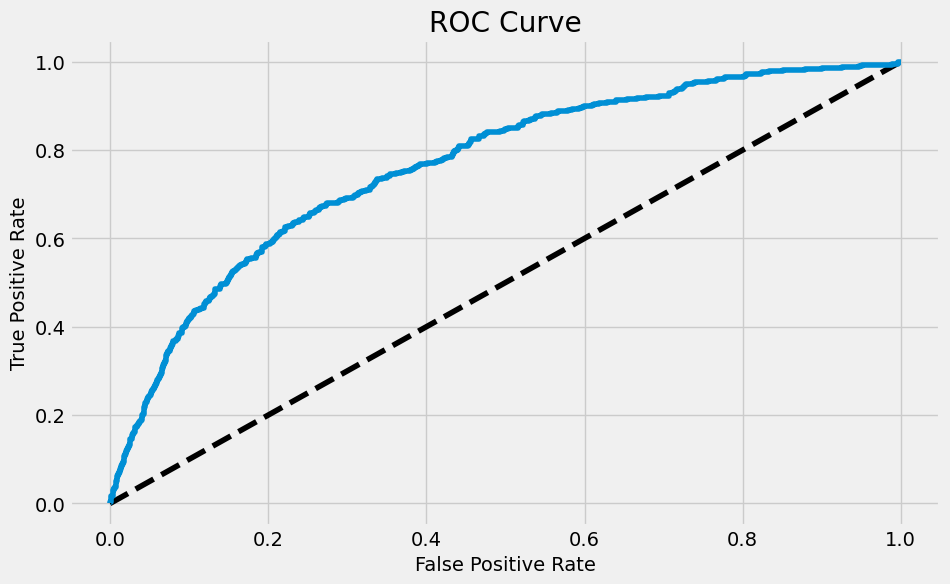

In [62]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])

# Plot the ROC curve

plt.figure(figsize=(10,6))

# Plotting the diagonal 50% line
plt.plot([0,1], [0,1], 'k--')

# Plotting FPR and TPR achieved by the model

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [63]:
auc = roc_auc_score(y_test, y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.7639510775647625


In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2379
           1       0.58      0.17      0.27       621

    accuracy                           0.80      3000
   macro avg       0.70      0.57      0.58      3000
weighted avg       0.77      0.80      0.76      3000



In [76]:
#def evaluate_model(y_test, predictions, y_scores):
 #   cm = confusion_matrix(y_test, predictions)
  #  accuracy = accuracy_score(y_test, predictions)
   # precision = precision_score(y_test, predictions)
    #recall = recall_score(y_test, predictions)
    #return cm, accuracy, precision, recall

In [77]:
#y_train_pred = lr.predict(X_train)
#y_test_pred = lr.predict(X_test)

In [78]:
# Evaluate Train and Test dataset
#model_train_cm , model_train_accuracy, model_train_precision, model_train_recall = evaluate_model(y_train, y_train_pred)

#model_test_cm , model_test_accuracy, model_test_precision, model_test_recall = evaluate_model(y_test, y_test_pred)

#print(f'Model performance for Training set\n')
#print(f"- Confusion Matrix: \n{model_train_cm}\n")
#print(f"- Accuracyr: {model_train_accuracy}")
#print(f"- Precison: {model_train_precision}")
#print(f"- Recall: {model_train_recall}")

In [79]:
#print(f'Model performance for Test set\n')
#print(f"- Confusion Matrix: \n{model_test_cm}\n")
#print(f"- Accuracyr: {model_test_accuracy}")
#print(f"- Precison: {model_test_precision}")
#print(f"- Recall: {model_test_recall}")

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Define preprocessing for numeric columns (Normalize them so they are on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[('scale', StandardScaler())])

In [ ]:

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

In [57]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Support Vector": SVC(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XgBoost": XGBClassifier(),
    "Catboost": CatBoostClassifier()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

Learning rate set to 0.023648
0:	learn: 0.6736496	total: 167ms	remaining: 2m 46s
1:	learn: 0.6554609	total: 171ms	remaining: 1m 25s
2:	learn: 0.6388659	total: 175ms	remaining: 58s
3:	learn: 0.6223825	total: 178ms	remaining: 44.4s
4:	learn: 0.6076487	total: 183ms	remaining: 36.4s
5:	learn: 0.5933821	total: 187ms	remaining: 31s
6:	learn: 0.5803484	total: 192ms	remaining: 27.2s
7:	learn: 0.5677551	total: 197ms	remaining: 24.4s
8:	learn: 0.5565816	total: 201ms	remaining: 22.1s
9:	learn: 0.5454881	total: 205ms	remaining: 20.3s
10:	learn: 0.5346016	total: 210ms	remaining: 18.9s
11:	learn: 0.5261066	total: 214ms	remaining: 17.6s
12:	learn: 0.5166113	total: 218ms	remaining: 16.6s
13:	learn: 0.5077151	total: 223ms	remaining: 15.7s
14:	learn: 0.5009943	total: 228ms	remaining: 15s
15:	learn: 0.4927505	total: 232ms	remaining: 14.3s
16:	learn: 0.4862796	total: 237ms	remaining: 13.7s
17:	learn: 0.4783497	total: 242ms	remaining: 13.2s
18:	learn: 0.4721690	total: 246ms	remaining: 12.7s
19:	learn: 0.46

KeyboardInterrupt: 